
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right">
<br><br>
<FONT FACE="times new roman" SIZE=5>
  <i ><b>Estudiantes:</b></i> Camilo Hernández, Esteban Arias, Hugo Espinosa, Santiago Vivas<br>
  <i><b>Docente:</b></i> Daniel Ospina<br>
  <i><b>Actividad:</b></i> Segundo Parcial<br>
  <i><b>Asignatura:</b></i> Inteligencia Artificial<br>
</FONT>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from seaborn.distributions import kdeplot 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## __Preparación de los datos__

In [ ]:
durl_file_path = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/housing2.csv'
data = pd.read_csv(durl_file_path)

In [ ]:
data.SalePrice = data.SalePrice.map(lambda x: str(x.replace('$','')))
data.SalePrice = data.SalePrice.map(lambda x: float(x.replace(',','.')))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 137.5+ KB


In [ ]:
data.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000.0
1,5,6,882.0,Y,896,105000.0
2,6,6,1329.0,Y,1329,172000.0
3,7,5,2110.0,Y,2110,244000.0
4,5,5,928.0,Y,1629,189900.0


**Tratamiento a Central Air**

In [ ]:
data['Central Air'] = data['Central Air'].replace({"Y":1, "N": 0})
data['Central Air']

0       1
1       1
2       1
3       1
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Name: Central Air, Length: 2930, dtype: int64

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=3, shuffle=True)

**Proceso de escalado**

In [ ]:
standar_scaler = StandardScaler()

In [ ]:
simple_imputer = SimpleImputer(strategy='mean')

In [ ]:
preprocessor = Pipeline(steps=[("numerical_imputer", simple_imputer), 
           ("scaler", standar_scaler)])

In [ ]:
transformed_train = preprocessor.fit_transform(train[['Overall Qual','Overall Cond', 'Total Bsmt SF', 'Central Air','Gr Liv Area']])
transformed_train = pd.DataFrame(transformed_train, columns=['Overall Qual','Overall Cond', 'Total Bsmt SF','Central Air', 'Gr Liv Area'], index=train.index)
transformed_train['SalePrice'] = train['SalePrice']
transformed_train.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2443,1.359084,-0.506931,-0.022379,0.268846,0.929475,286000.0
1512,-1.471385,1.259979,-0.235056,0.268846,-0.401542,108000.0
1411,-0.763768,-0.506931,-0.425346,-3.719603,-1.234401,99600.0
1374,-1.471385,-1.390386,-2.359586,0.268846,0.174454,134432.0
1790,1.359084,-0.506931,1.414868,0.268846,0.380723,307000.0


In [ ]:
transformed_train.shape

(2344, 6)

## __Análisis exploratorio__

**Genere un resumen estadístico utilizando el método**

In [ ]:
transformed_train.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2344.000000
mean,2.425061e-16,-3.395085e-16,-1.106434e-16,-1.591446e-16,-5.607952e-17,180620.603242
std,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,81141.534863
min,-3.594236e+00,-4.040751e+00,-2.359586e+00,-3.719603e+00,-2.265744e+00,12789.000000
25%,-7.637676e-01,-5.069312e-01,-5.781375e-01,2.688459e-01,-7.347827e-01,129000.000000
50%,-5.615050e-02,-5.069312e-01,-1.410307e-01,2.688459e-01,-1.135440e-01,160000.000000
75%,6.514666e-01,3.765237e-01,5.462513e-01,2.688459e-01,4.896949e-01,213492.500000
max,2.774318e+00,3.026888e+00,1.131889e+01,2.688459e-01,8.063261e+00,755000.000000


**Genere el histograma de frecuencias para todas las características disponibles**

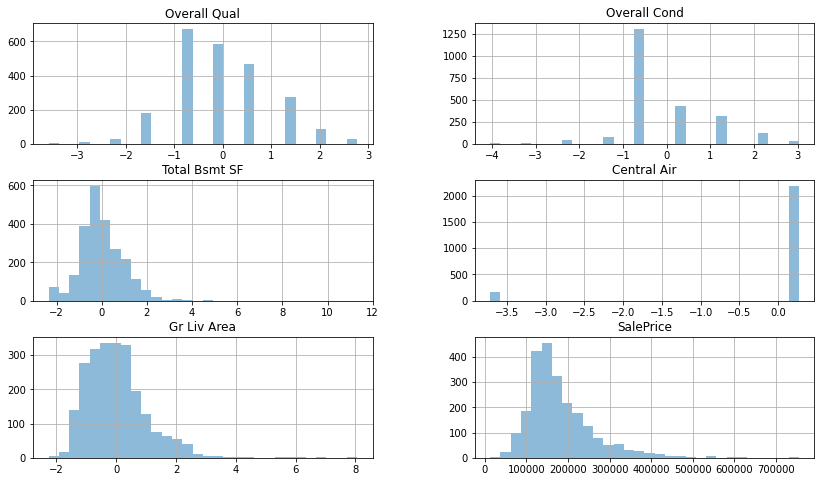

In [ ]:
transformed_train.hist(bins=30, figsize=(14,8), alpha=0.5) 
plt.show()

**Identifique posibles valores atípicos en los datos. Elimine los valores utilizando el método IQR (si lo considera necesario)**

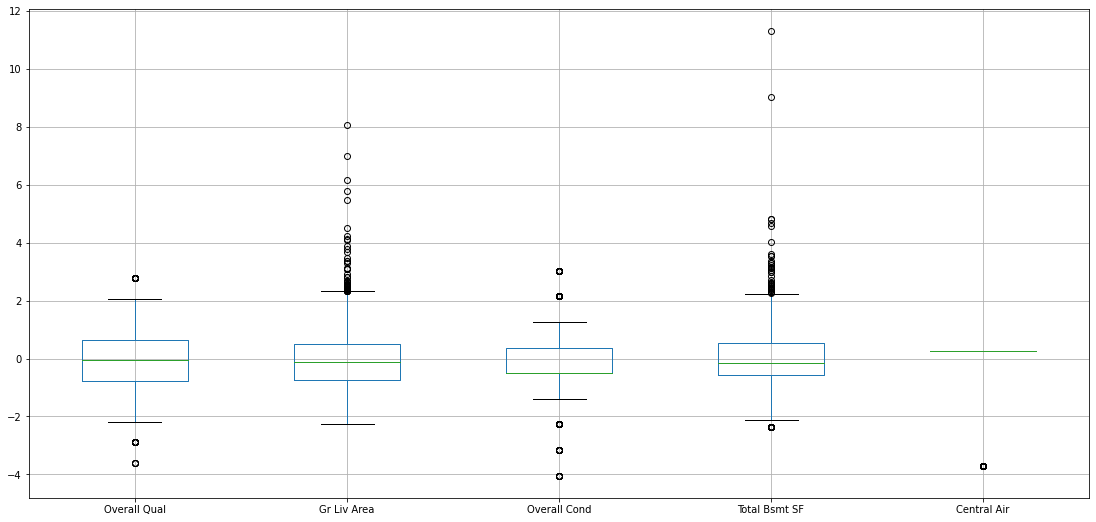

In [ ]:
transformed_train[['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF', 'Central Air']].boxplot(figsize=(19,9))
plt.show()

In [ ]:
import scipy.stats as stats

Q1 = transformed_train.quantile(0.25)
Q3 = transformed_train.quantile(0.75)
IQR = transformed_train.apply(stats.iqr)
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [ ]:
transformed_train.shape

(2344, 6)

In [ ]:
#transformed_train = transformed_train[~((transformed_train < lower_limit) | (transformed_train > upper_limit)).any(axis=1)]
transformed_train.shape

(2344, 6)

In [ ]:
transformed_train.shape

(2344, 6)

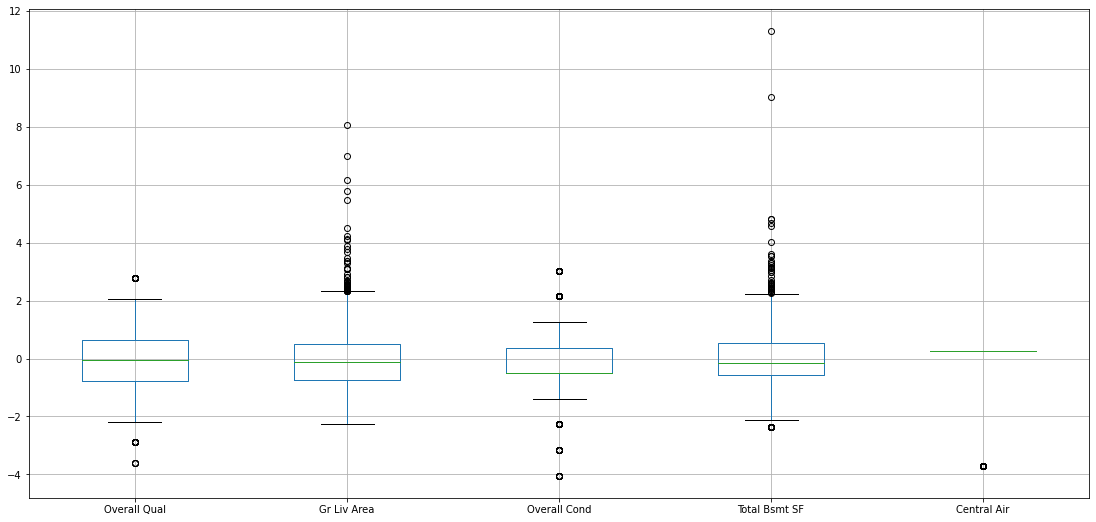

In [ ]:
transformed_train[['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF', 'Central Air']].boxplot(figsize=(19,9))
plt.show()

**Genere una matriz de dispersión para identificar correlaciones entre variables**

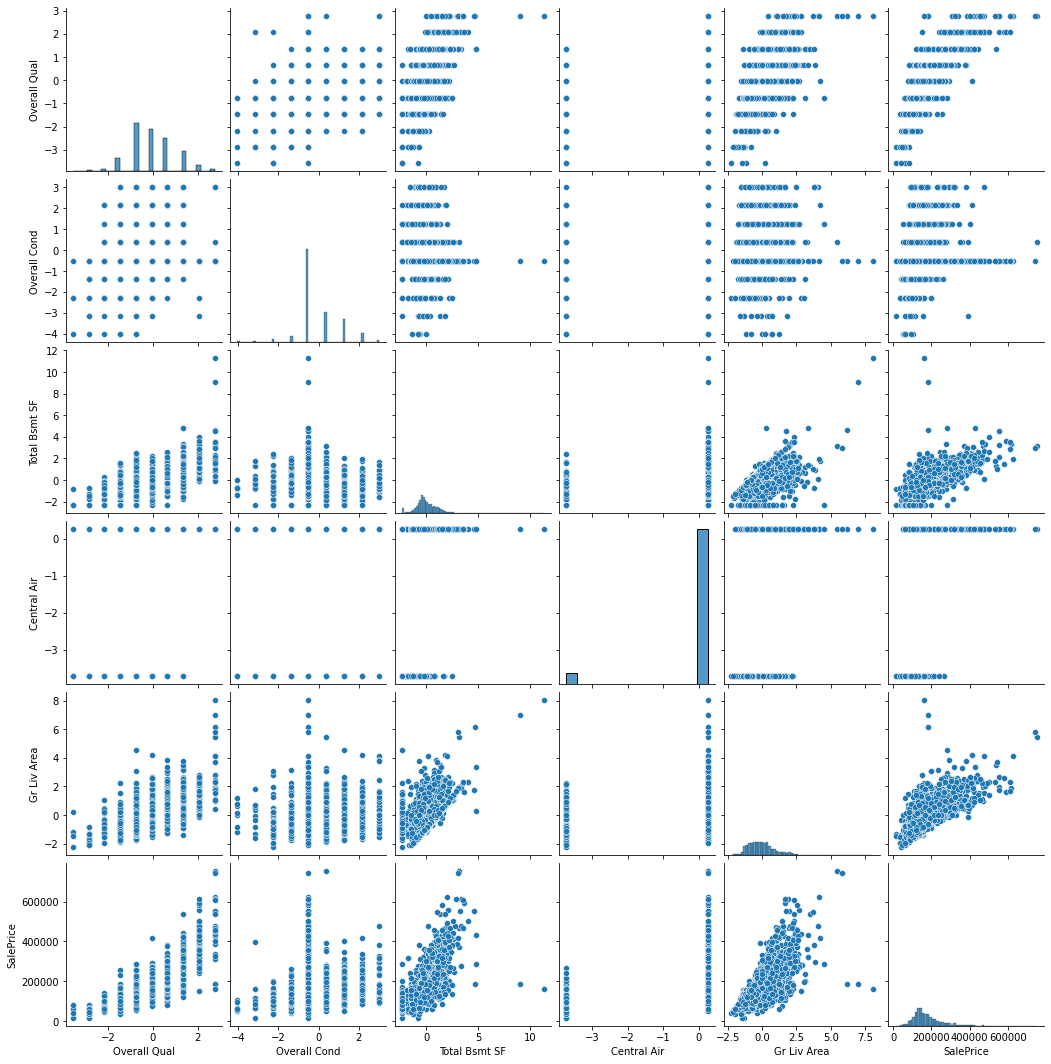

In [ ]:
sns.pairplot(transformed_train)

**Genere la matriz de correlación para todas las características y preséntela a través de un mapa de calor.**

In [ ]:
transformed_train.corr()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
Overall Qual,1.000000,-0.094340,0.549221,0.292027,0.581351,0.798626
Overall Cond,-0.094340,1.000000,-0.172949,0.134783,-0.125590,-0.097876
Total Bsmt SF,0.549221,-0.172949,1.000000,0.225107,0.458663,0.625154
Central Air,0.292027,0.134783,0.225107,1.000000,0.130098,0.265158
Gr Liv Area,0.581351,-0.125590,0.458663,0.130098,1.000000,0.708178
SalePrice,0.798626,-0.097876,0.625154,0.265158,0.708178,1.000000


In [ ]:
transformed_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.798626
Gr Liv Area      0.708178
Total Bsmt SF    0.625154
Central Air      0.265158
Overall Cond    -0.097876
Name: SalePrice, dtype: float64

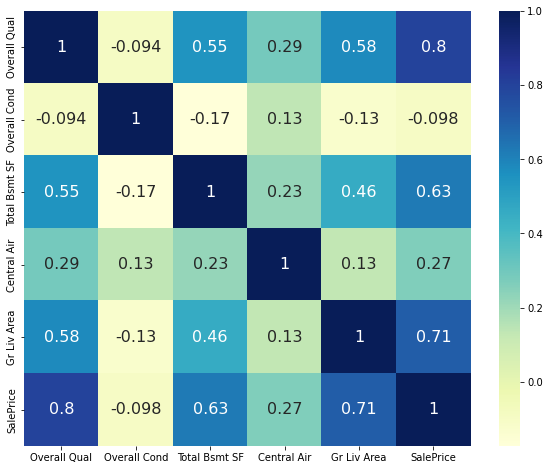

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc({'size': '18'})
sns.heatmap(transformed_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

Considerando los valores de correlación determine cuales variables podrían tener una mayor influencia sobre el modelo.

*` Superficie habitable por encima del nivel del suelo en pies cuadrados (Giv Liv Area) tiene la correlación más alta en comparación con las demás características`

## __Generar el modelo__



In [ ]:
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('SalePrice', axis='columns'), train['SalePrice']

In [ ]:
for feature in X_train.columns:
  
  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
           ("scaler", StandardScaler()), 
           ("sgd", SGDRegressor())])
  
  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

En cada caso genere un gráfico con los datos de entrenamiento y la línea de regresión

In [ ]:

y_values = y_train.values.reshape(-1, 1)
y_values.size

X_values = X_train.iloc[:,1].values.reshape(-1, 1)
X_values.size

transformed_train.iloc[:,1].size
y_values.size

2344

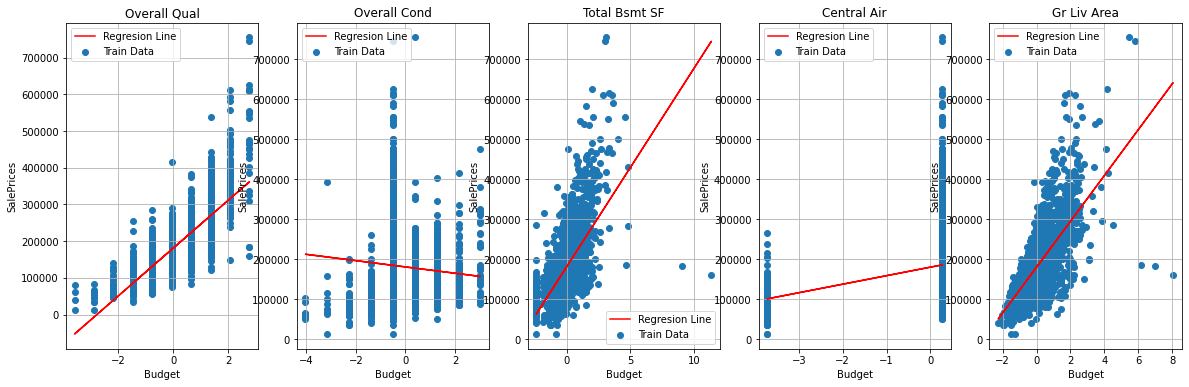

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i in range(5):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train.iloc[:,i], y_values, label='Train Data')
  model = model_result[X_train.columns[i]]
  predicted = model.predict(X_values)

  axes[i].plot(transformed_train.iloc[:,i], predicted, color='red', label='Regresion Line')
  axes[i].set_title(X_train.columns[i])
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('SalePrices')
  axes[i].grid()
  axes[i].legend()

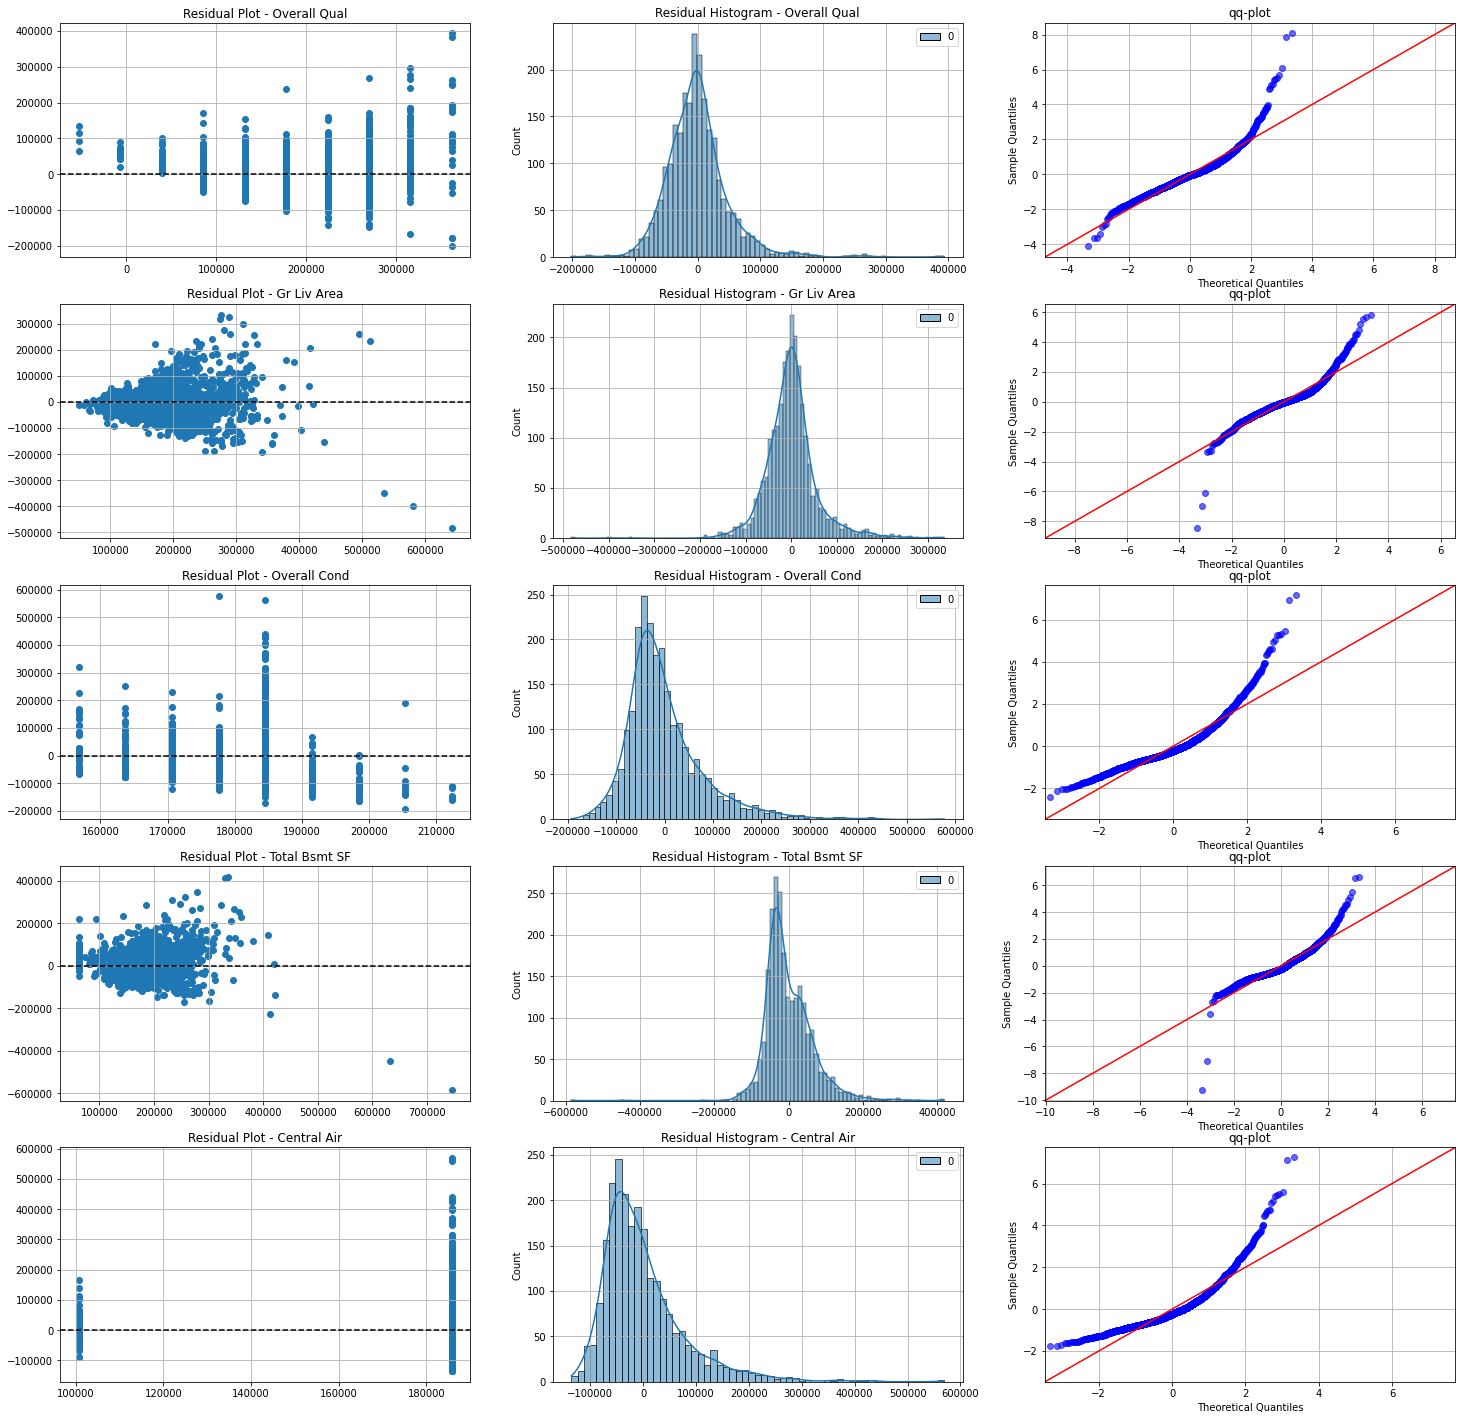

In [ ]:
from statsmodels.api import qqplot

selected = ['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF', 'Central Air']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(25, 25))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1) 
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

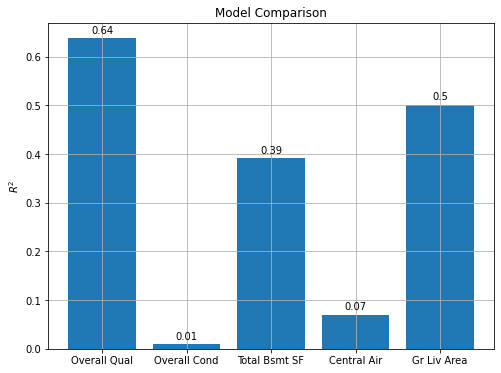

In [ ]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

In [ ]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF','Central Air']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['Overall Qual'],
 ['Gr Liv Area'],
 ['Overall Cond'],
 ['Total Bsmt SF'],
 ['Central Air'],
 ['Overall Qual', 'Gr Liv Area'],
 ['Overall Qual', 'Overall Cond'],
 ['Overall Qual', 'Total Bsmt SF'],
 ['Overall Qual', 'Central Air'],
 ['Gr Liv Area', 'Overall Cond'],
 ['Gr Liv Area', 'Total Bsmt SF'],
 ['Gr Liv Area', 'Central Air'],
 ['Overall Cond', 'Total Bsmt SF'],
 ['Overall Cond', 'Central Air'],
 ['Total Bsmt SF', 'Central Air'],
 ['Overall Qual', 'Gr Liv Area', 'Overall Cond'],
 ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF'],
 ['Overall Qual', 'Gr Liv Area', 'Central Air'],
 ['Overall Qual', 'Overall Cond', 'Total Bsmt SF'],
 ['Overall Qual', 'Overall Cond', 'Central Air'],
 ['Overall Qual', 'Total Bsmt SF', 'Central Air'],
 ['Gr Liv Area', 'Overall Cond', 'Total Bsmt SF'],
 ['Gr Liv Area', 'Overall Cond', 'Central Air'],
 ['Gr Liv Area', 'Total Bsmt SF', 'Central Air'],
 ['Overall Cond', 'Total Bsmt SF', 'Central Air']]

In [ ]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()
   
   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
           ("scaler", StandardScaler()), 
           ("sgd", SGDRegressor())])
  
   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

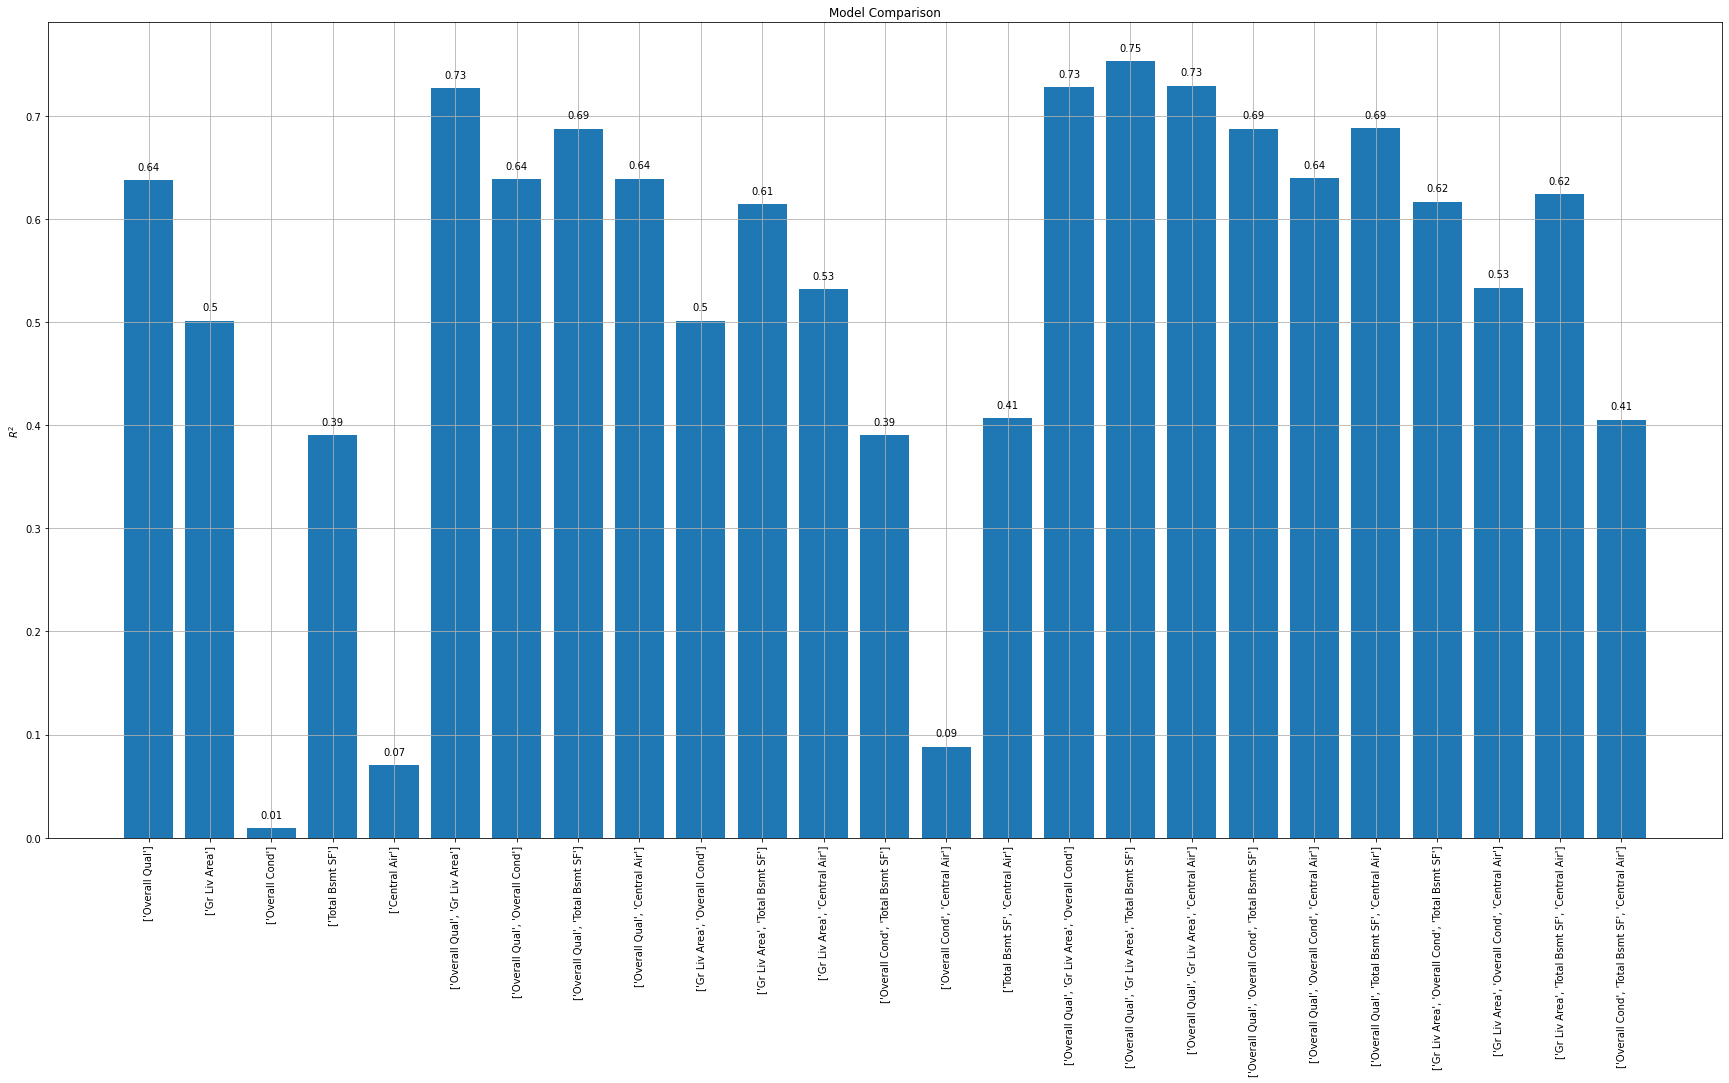

In [ ]:
plt.figure(figsize=(30,15))
plt.bar(model_final.keys(), final_scores)
plt.ylabel('$R^2$')
plt.xticks(rotation = 90)
plt.title('Model Comparison')
plt.grid()
  
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(model_final.keys(), final_scores)    

## __Evaluación de desempeño__

Evalúe cada modelo con los datos de prueba. Recuerde utilizar el  pipeline de preprocesamiento .

In [ ]:
test_scores = []

X_test, y_test = test.drop('SalePrice', axis='columns'), test['SalePrice']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

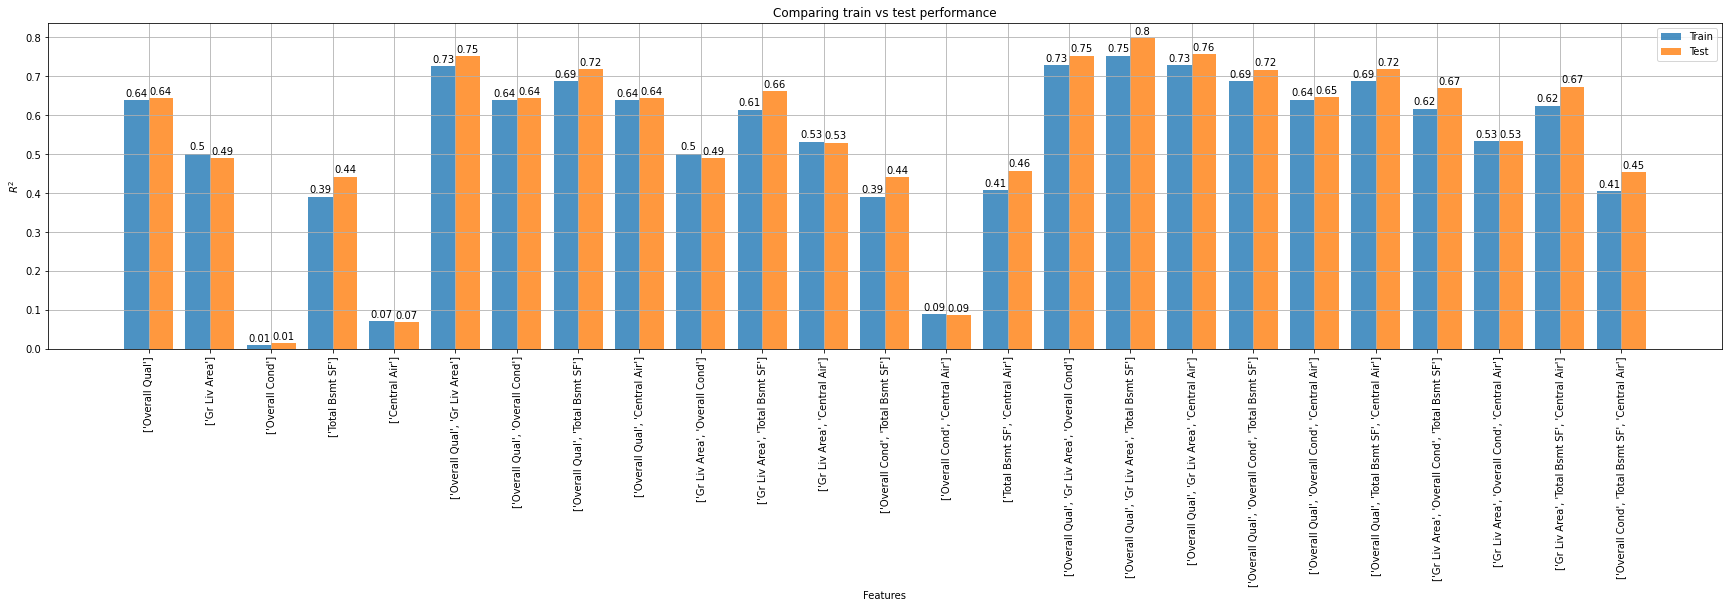

In [ ]:
plt.figure(figsize=(30,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2,test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xticks(rotation= 90)
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()
  
def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

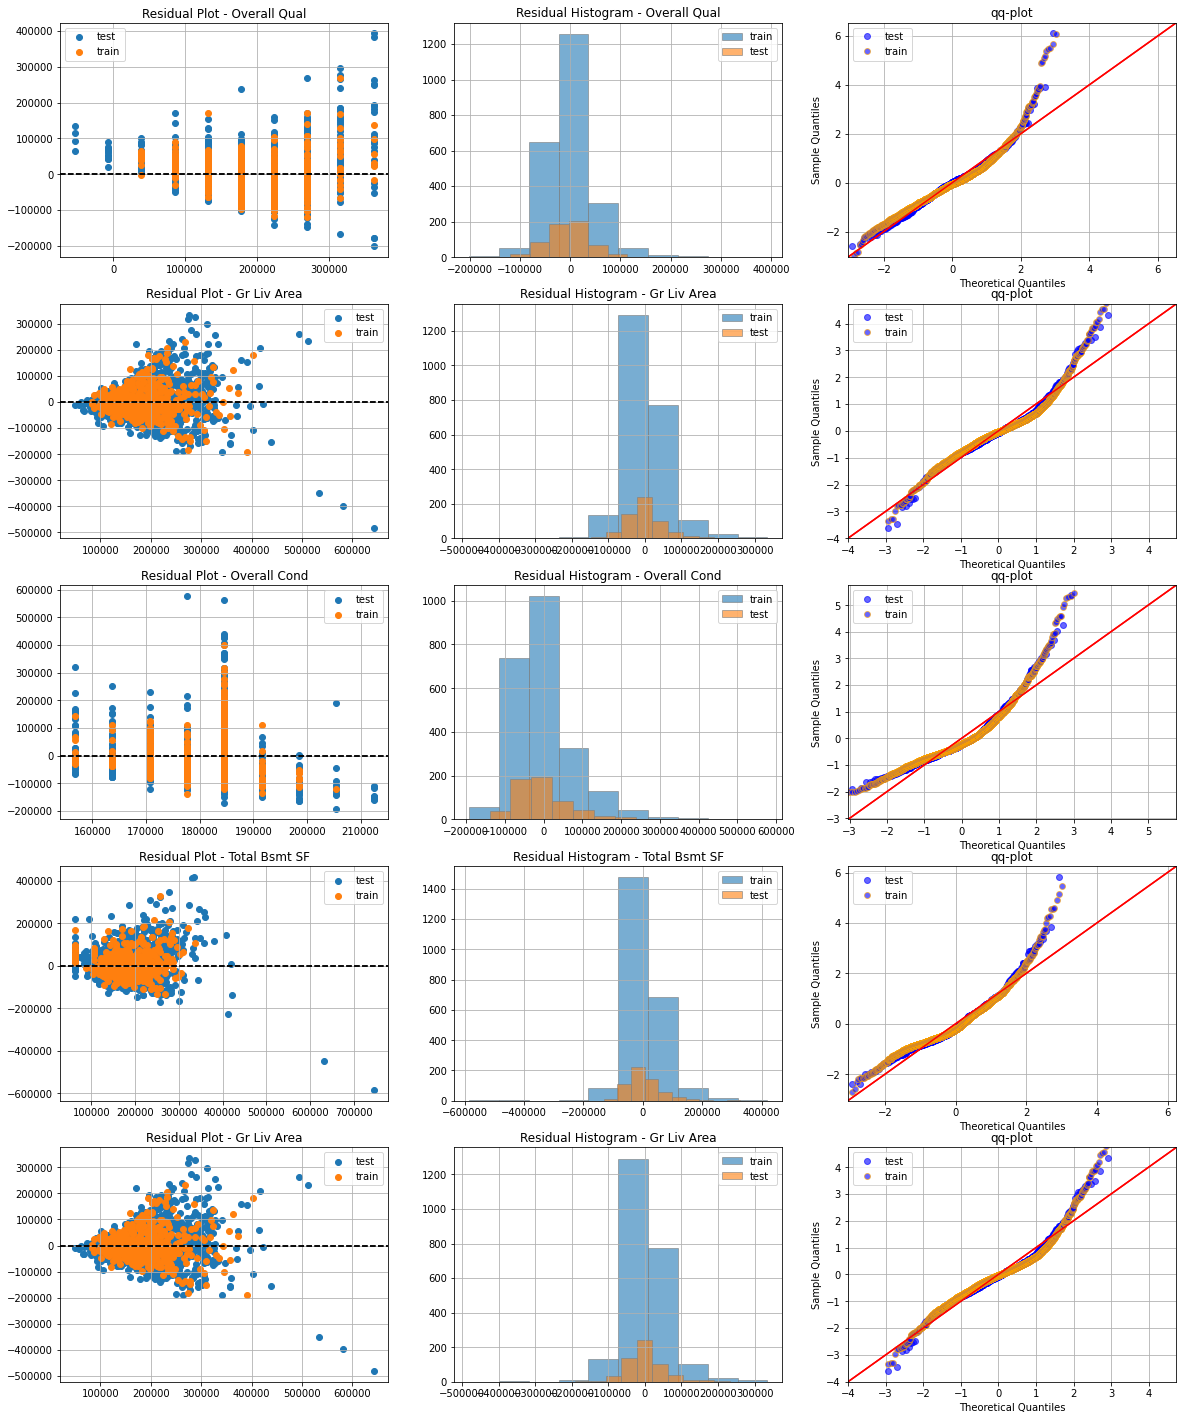

In [ ]:
selected = ['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF', 'Gr Liv Area']
fig, axes = plt.subplots(5, 3, figsize=(20, 25))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination] 

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1) 
  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()

In [ ]:
X_train

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area
2443,8,5,1044.0,1,1976
1512,4,7,949.0,1,1292
1411,5,5,864.0,0,864
1374,4,4,0.0,1,1588
1790,8,5,1686.0,1,1694
...,...,...,...,...,...
2304,5,6,864.0,1,887
968,9,5,1978.0,1,1978
1667,5,5,950.0,1,950
1688,8,5,1734.0,1,1734


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = regressorSGD.score(X_values,y_values)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(y_values, y_pred))
print('MSE:', mean_squared_error(y_values, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_values, y_pred)))

Coefficient of determination in the training set:  0.45318575055027444
MAE: 38273.214733421104
MSE: 2842210404.5043287
RMSE: 53312.38509487574


**Selección del modelo**

Tras analizar los resultados de la evaluación de desempeño, se observa que el modelo con score más alto, tanto para entrenamiento como para prueba, es aquel que ocupa las siguientes features: ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF'], por lo tanto se procede a entrenar el modelo final con dichas features sobre la totalidad de los datos de prueba y test.

In [ ]:
final_features1 = ['Overall Qual','Gr Liv Area', 'Total Bsmt SF']
regressorSGD = Pipeline(
    steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
          ("scaler", StandardScaler()), 
          ("sgd", SGDRegressor())])

regressorSGD.fit(data[final_features1], data['SalePrice'])
prediction_sgd=regressorSGD.predict(data[final_features1])
error_sgd = mean_absolute_error(data['SalePrice'], prediction_sgd)

train_score_sgd = regressorSGD.score(data[final_features1], data['SalePrice'])

**Recomendación para la empresa**

Los datos parecen presentar un ajuste adecuado sin llegar al overfitting, y tampoco caen en underfitting (para el modelo seleccionado). Los datos de overall condition y central air no resultan muy significativos para el calculo de los precios por si solos. Sin embargo, los otros tres datos son bastante relevantes, tanto así que presentan modelos descentes al ser entrenados únicamente en estos datos individualmente. El tamaño de la muestra tiene buenos resultados para el cálculo, pero sería necesario revisar en que año fueron tomadas las muestras y en que lugares para llegar a conclusiones más relevantes con respecto al alcance del modelo.

**creación del modelo arbol de decisión y bosques aleatorios**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision_tree = Pipeline(
    steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
          ("scaler", StandardScaler()), 
          ("DecisionTree", DecisionTreeRegressor())])

regressor_decision_tree.fit(data[final_features1], data['SalePrice'])
prediction_decision_tree=regressor_decision_tree.predict(data[final_features1])
error_descision_tree = mean_absolute_error(data['SalePrice'], prediction_decision_tree)

train_score_decission_tree = regressor_decision_tree.score(data[final_features1], data['SalePrice'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = Pipeline(
    steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
          ("scaler", StandardScaler()), 
          ("RandomForest", RandomForestRegressor())])

regressor_random_forest.fit(data[final_features1], data['SalePrice'])
prediction_random_forest=regressor_decision_tree.predict(data[final_features1])
error_random_forest = mean_absolute_error(data['SalePrice'], prediction_random_forest)

train_score_random_forest = regressor_random_forest.score(data[final_features1], data['SalePrice'])

In [ ]:
selected = ['Overall Qual','Gr Liv Area', 'Overall Cond', 'Total Bsmt SF', 'Gr Liv Area']
fig, axes = plt.subplots(5, 3, figsize=(20, 25))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination] 

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1) 
  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()

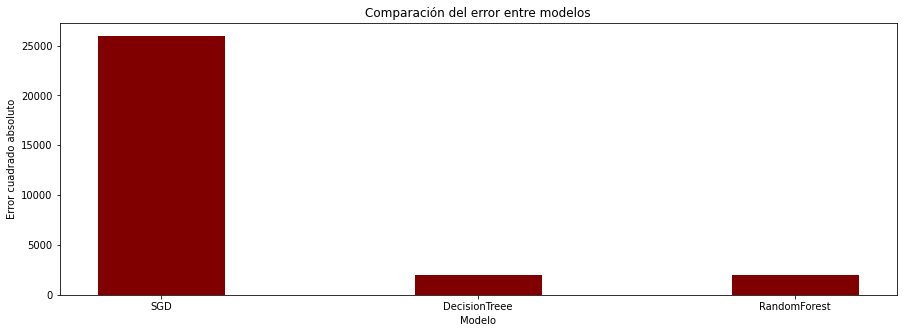

In [ ]:
datos_error = {'SGD': error_sgd, 'DecisionTreee': error_descision_tree, 'RandomForest': error_random_forest}
algoritmos = list(datos_error.keys())
expanded = list(datos_error.values())
  
fig = plt.figure(figsize = (15, 5))
 
plt.bar(algoritmos, expanded, color ='maroon',
        width = 0.4)


plt.xlabel("Modelo")
plt.ylabel("Error cuadrado absoluto")
plt.title("Comparación del error entre modelos")
plt.show()

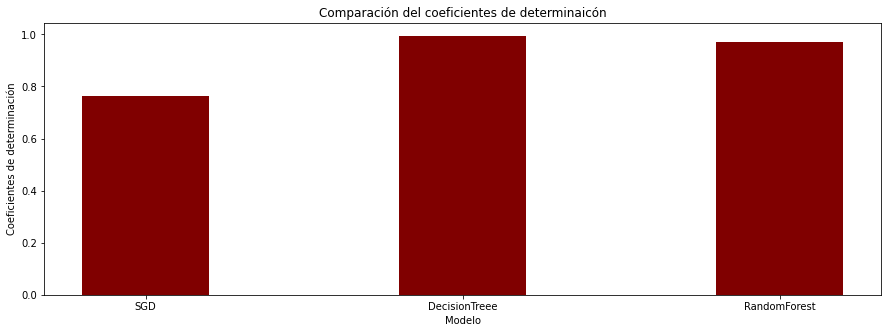

In [ ]:
datos_coeficientes = {'SGD': train_score_sgd, 'DecisionTreee': train_score_decission_tree, 'RandomForest': train_score_random_forest}
algoritmos = list(datos_coeficientes.keys())
expanded = list(datos_coeficientes.values())
  
fig = plt.figure(figsize = (15, 5))
 
plt.bar(algoritmos, expanded, color ='maroon',
        width = 0.4)


plt.xlabel("Modelo")
plt.ylabel("Coeficientes de determinación")
plt.title("Comparación del coeficientes de determinaicón")
plt.show()